## Problem Statement

Here we going to see how we can evaluate the models generated with CustomerPredictionTrainModel file using the respective pickle file


## Test Data Set

In [ ]:
# !pip install seaborn

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

In [3]:
# Load Test dataset
original = pd.read_csv('/usr/local/myapp/src/dataset/CreditCardTest.csv')

## Dataset Overview

In [4]:
test_sdf = original

In [5]:
original.head(2)

ID Gender  Age Region_Code Occupation Channel_Code  Vintage  \
0  VBENBARO   Male   29       RG254      Other           X1       25   
1  CCMEWNKY   Male   43       RG268      Other           X2       49   

  Credit_Product  Avg_Account_Balance Is_Active  
0            Yes               742366        No  
1            NaN               925537        No

In [6]:
test_sdf.head(2)

ID Gender  Age Region_Code Occupation Channel_Code  Vintage  \
0  VBENBARO   Male   29       RG254      Other           X1       25   
1  CCMEWNKY   Male   43       RG268      Other           X2       49   

  Credit_Product  Avg_Account_Balance Is_Active  
0            Yes               742366        No  
1            NaN               925537        No

In [7]:
test_sdf=test_sdf.drop(["ID"],axis=1)

In [8]:
print("***** Shape of dataset is (Rows, Columns) *****")
print()
test_sdf.shape   #shape of training data

***** Shape of dataset is (Rows, Columns) *****



(105312, 9)

In [9]:
print("***** List of Columnspresent in dataset *****")
print()
test_sdf.columns  #Column names

***** List of Columnspresent in dataset *****



Index(['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code', 'Vintage',
       'Credit_Product', 'Avg_Account_Balance', 'Is_Active'],
      dtype='object')

In [10]:
print("***** List of Columns present in dataset *****")
test_sdf.info()

***** List of Columns present in dataset *****
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Gender               105312 non-null  object
 1   Age                  105312 non-null  int64 
 2   Region_Code          105312 non-null  object
 3   Occupation           105312 non-null  object
 4   Channel_Code         105312 non-null  object
 5   Vintage              105312 non-null  int64 
 6   Credit_Product       92790 non-null   object
 7   Avg_Account_Balance  105312 non-null  int64 
 8   Is_Active            105312 non-null  object
dtypes: int64(3), object(6)
memory usage: 7.2+ MB


In [11]:
print("**** This method gives us very nice descriptive statistics. We don't need this for now, but will later on! ****")
test_sdf.describe()

**** This method gives us very nice descriptive statistics. We don't need this for now, but will later on! ****


Age        Vintage  Avg_Account_Balance
count  105312.000000  105312.000000         1.053120e+05
mean       43.871002      46.842819         1.134195e+06
std        14.872890      32.273634         8.662430e+05
min        24.000000       7.000000         2.259700e+04
25%        30.000000      20.000000         6.039822e+05
50%        43.000000      32.000000         8.966345e+05
75%        54.000000      73.000000         1.371598e+06
max        85.000000     135.000000         9.908858e+06

## Cleaning Data Set

In [12]:
test_sdf.isnull().sum()

Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

### Clean missing data - Impute missing data from frequently used values

In [13]:
# Iterate over each column of train_sdf
for col in test_sdf.columns:
    # Check if the column is of object type
    if test_sdf[col].dtypes == 'object':
        # Impute with the most frequent value
        test_sdf = test_sdf.fillna(test_sdf[col].value_counts().index[0])

# Count the number of NaNs in the dataset and print the counts to verify
test_sdf.isnull().values.sum()

0

In [14]:
test_sdf.head(3)

Gender  Age Region_Code Occupation Channel_Code  Vintage Credit_Product  \
0   Male   29       RG254      Other           X1       25            Yes   
1   Male   43       RG268      Other           X2       49           Male   
2   Male   31       RG270   Salaried           X1       14             No   

   Avg_Account_Balance Is_Active  
0               742366        No  
1               925537        No  
2               215949        No

## Get Unique Value Count

In [15]:
columns=[ 'Gender', 'Region_Code', 'Occupation', 'Channel_Code',
        'Credit_Product', 'Is_Active']

for i in columns:
    print("***************************************************")
    print(i)
    print("***************************************************")
    print("Value counts of",i,"is :")
    print(test_sdf[i].value_counts())
    print()
    print("Unique values of",i,"is :",test_sdf[i].unique()) 
    

***************************************************
Gender
***************************************************
Value counts of Gender is :
Male      57705
Female    47607
Name: Gender, dtype: int64

Unique values of Gender is : ['Male' 'Female']
***************************************************
Region_Code
***************************************************
Value counts of Region_Code is :
RG268    15125
RG283    12881
RG254    11737
RG284     8173
RG277     5596
RG280     5529
RG270     3440
RG269     3288
RG261     3286
RG251     2678
RG257     2588
RG272     2338
RG282     2337
RG274     2208
RG281     2144
RG252     1811
RG273     1803
RG263     1615
RG279     1600
RG275     1383
RG260     1300
RG264     1241
RG256     1194
RG276     1185
RG259     1102
RG250     1048
RG255      891
RG278      824
RG258      812
RG253      810
RG262      800
RG265      668
RG271      654
RG266      631
RG267      592
Name: Region_Code, dtype: int64

Unique values of Region_Code is : ['RG254' 'RG2

### Exploratory Data Analysis

/usr/local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Credit_Product', ylabel='count'>

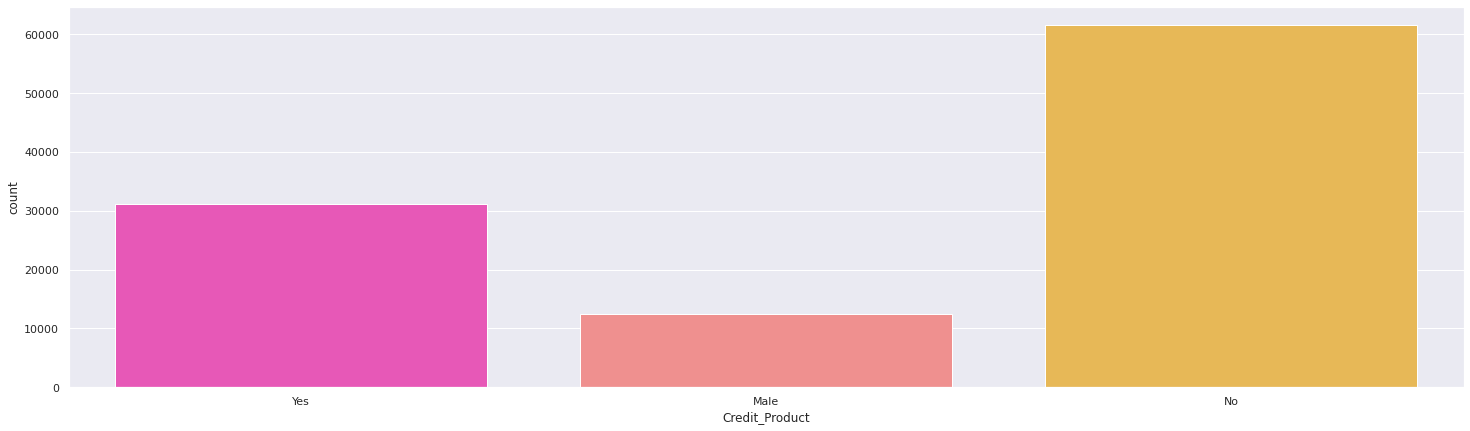

In [16]:
plt.figure(figsize=(25,7))
sns.countplot('Credit_Product',data=test_sdf,palette='spring')

/usr/local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Vintage', ylabel='count'>

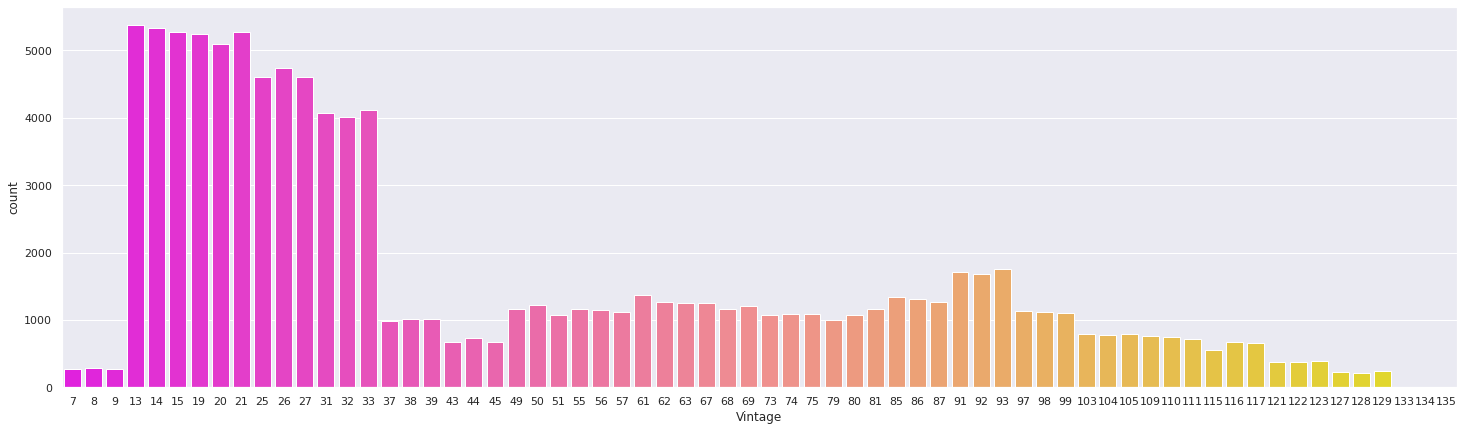

In [17]:
plt.figure(figsize=(25,7))
sns.countplot('Vintage',data=test_sdf,palette='spring')

/usr/local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Region_Code', ylabel='count'>

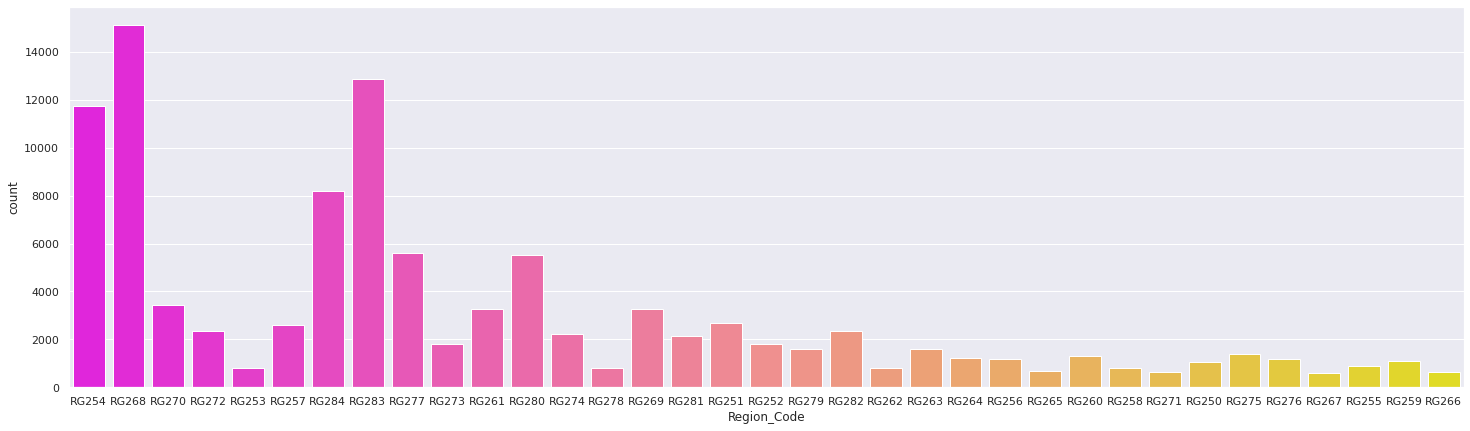

In [18]:
plt.figure(figsize=(25,7))
sns.countplot('Region_Code',data=test_sdf,palette='spring')

/usr/local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Channel_Code', ylabel='count'>

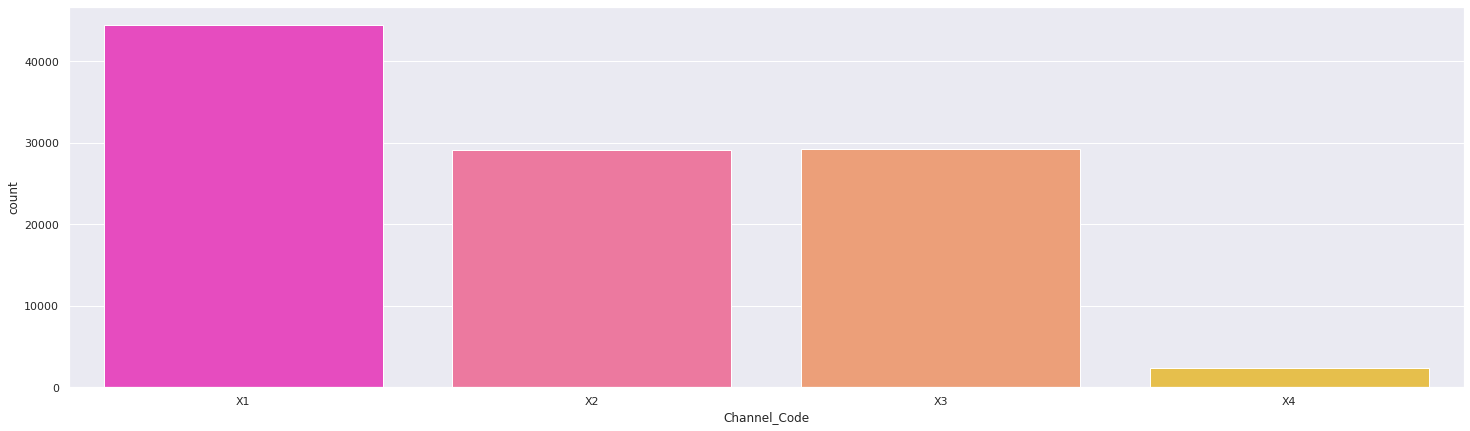

In [19]:
plt.figure(figsize=(25,7))
sns.countplot('Channel_Code',data=test_sdf,palette='spring')

/usr/local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age', ylabel='count'>

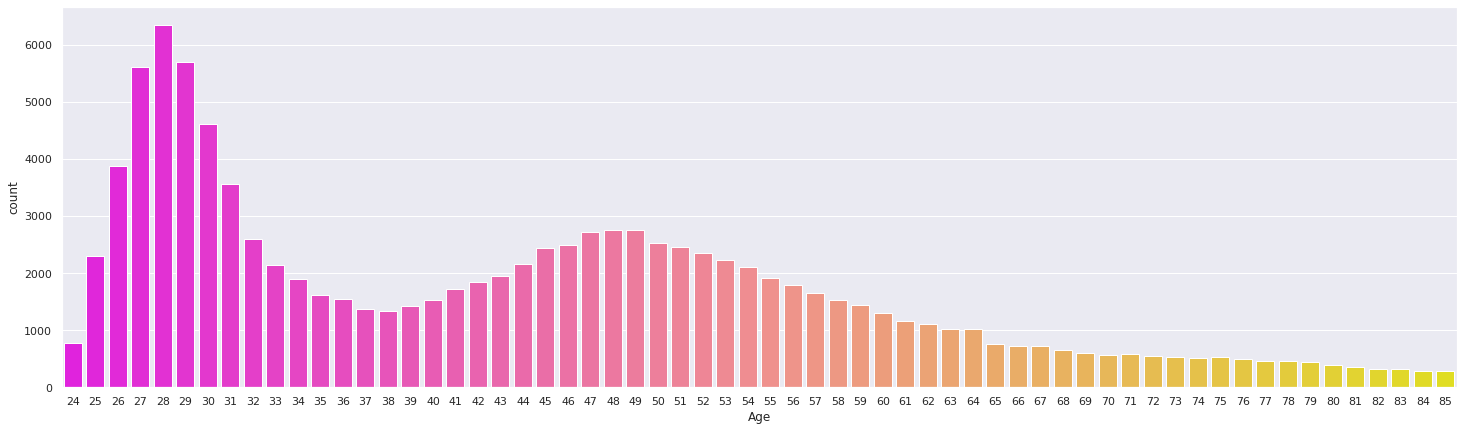

In [20]:
plt.figure(figsize=(25,7))
sns.countplot('Age',data=test_sdf,palette='spring')

## Quick Visualize

In [21]:
def with_hue(data,feature,ax):
    
    #Numnber of categories
    num_of_cat=len([x for x in data[feature].unique() if x==x])
    
    bars=ax.patches
    
    for ind in range(num_of_cat):
        ##     Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::num_of_cat] 
        # Get the total height (for percentages)
        total=sum([x.get_height() for x in hueBars])
        #Printing percentages on bar
        for bar in hueBars:
            percentage='{:.1f}%'.format(100 * bar.get_height()/total)
            ax.text(bar.get_x()+bar.get_width()/2.0,
                   bar.get_height(),
                   percentage,
                    ha="center",va="bottom",fontweight='bold',fontsize=14)
    

    
def without_hue(data,feature,ax):
    
    total=float(len(data))
    bars_plot=ax.patches
    
    for bars in bars_plot:
        percentage = '{:.1f}%'.format(100 * bars.get_height()/total)
        x = bars.get_x() + bars.get_width()/2.0
        y = bars.get_height()
        ax.text(x, y,(percentage,bars.get_height()),ha='center',fontweight='bold',fontsize=14)

## Convert Categorial Value to Integer

In [22]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le = LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in test_sdf.columns:
    # Compare if the dtype is object
    if test_sdf[col].dtype=='object':
    # Use LabelEncoder to do the numeric transformation
        test_sdf[col]=le.fit_transform(test_sdf[col])

In [23]:
test_sdf.head(3)

Gender  Age  Region_Code  Occupation  Channel_Code  Vintage  \
0       1   29            4           1             0       25   
1       1   43           18           1             1       49   
2       1   31           20           2             0       14   

   Credit_Product  Avg_Account_Balance  Is_Active  
0               2               742366          0  
1               0               925537          0  
2               1               215949          0

In [ ]:
## Get Unique Value Count

In [24]:
columns=[ 'Gender', 'Region_Code', 'Occupation', 'Channel_Code',
        'Credit_Product', 'Is_Active']

for i in columns:
    print("***************************************************")
    print(i)
    print("***************************************************")
    print("Value counts of",i,"is :")
    print(test_sdf[i].value_counts())
    print()
    print("Unique values of",i,"is :",test_sdf[i].unique()) 

***************************************************
Gender
***************************************************
Value counts of Gender is :
1    57705
0    47607
Name: Gender, dtype: int64

Unique values of Gender is : [1 0]
***************************************************
Region_Code
***************************************************
Value counts of Region_Code is :
18    15125
33    12881
4     11737
34     8173
27     5596
30     5529
20     3440
19     3288
11     3286
1      2678
7      2588
22     2338
32     2337
24     2208
31     2144
2      1811
23     1803
13     1615
29     1600
25     1383
10     1300
14     1241
6      1194
26     1185
9      1102
0      1048
5       891
28      824
8       812
3       810
12      800
15      668
21      654
16      631
17      592
Name: Region_Code, dtype: int64

Unique values of Region_Code is : [ 4 18 20 22  3  7 34 33 27 23 11 30 24 28 19 31  1  2 29 32 12 13 14  6
 15 10  8 21  0 25 26 17  5  9 16]
********************************

## Predict Test Data Set with Decision Tree

## Import Pickle File

In [25]:
test_sdf.head()

Gender  Age  Region_Code  Occupation  Channel_Code  Vintage  \
0       1   29            4           1             0       25   
1       1   43           18           1             1       49   
2       1   31           20           2             0       14   
3       1   29           22           1             0       33   
4       0   29           20           1             0       19   

   Credit_Product  Avg_Account_Balance  Is_Active  
0               2               742366          0  
1               0               925537          0  
2               1               215949          0  
3               1               868070          0  
4               1               657087          0

In [26]:
pickle_off = open("decisiontree_model_gini.pickle", 'rb')
load_model = pickle.load(pickle_off)
predict_test = load_model.predict(test_sdf)

In [27]:
predict_test

array([0, 1, 0, ..., 0, 0, 0])

In [28]:
original['Is_Lead_dstree'] = predict_test

In [30]:
original.head()

ID  Gender  Age Region_Code Occupation Channel_Code  Vintage  \
0  VBENBARO    Male   29       RG254      Other           X1       25   
1  CCMEWNKY    Male   43       RG268      Other           X2       49   
2  VK3KGA9M    Male   31       RG270   Salaried           X1       14   
3  TT8RPZVC    Male   29       RG272      Other           X1       33   
4  SHQZEYTZ  Female   29       RG270      Other           X1       19   

  Credit_Product  Avg_Account_Balance Is_Active  Is_Lead_dstree  
0            Yes               742366        No               0  
1            NaN               925537        No               1  
2             No               215949        No               0  
3             No               868070        No               0  
4             No               657087        No               0

## Evaluate with Test Data set with LGBM

In [31]:
pickle_off = open("logistic_regression.pickle", 'rb')
load_model = pickle.load(pickle_off)
predict_test_lgbm = load_model.predict(test_sdf)

In [33]:
original['Is_Lead_lgbm'] = predict_test_lgbm

In [34]:
original

ID  Gender  Age Region_Code Occupation Channel_Code  Vintage  \
0       VBENBARO    Male   29       RG254      Other           X1       25   
1       CCMEWNKY    Male   43       RG268      Other           X2       49   
2       VK3KGA9M    Male   31       RG270   Salaried           X1       14   
3       TT8RPZVC    Male   29       RG272      Other           X1       33   
4       SHQZEYTZ  Female   29       RG270      Other           X1       19   
...          ...     ...  ...         ...        ...          ...      ...   
105307  DBENJOYI    Male   52       RG268   Salaried           X2       86   
105308  CWQ72DWS    Male   55       RG277      Other           X2       86   
105309  HDESC8GU    Male   35       RG254   Salaried           X4       15   
105310  2PW4SFCA    Male   53       RG254      Other           X3       93   
105311  F2NOYPPZ    Male   27       RG256   Salaried           X1       21   

       Credit_Product  Avg_Account_Balance Is_Active  Is_Lead_dstree  \
0                 Yes               742366        No               0   
1                 NaN               925537        No               1   
2                  No               215949        No               0   
3                  No               868070        No               0   
4                  No               657087        No               0   
...               ...                  ...       ...             ...   
105307            Yes              4242558       Yes               1   
105308            Yes              1159153        No               1   
105309             No              1703727        No               0   
105310             No               737178       Yes               0   
105311             No               591565        No               0   

        Is_Lead_lgbm  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
105307             0  
105308             0  
105309             0  
105310             0  
105311             0  

[105312 rows x 12 columns]

## For this data set, let's go with LGBM applied to get final submission

